# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import random as rd
import os

# After uploading some account's posts for the duration of 28 days in csv format, we'll start by reading the file and taking a closer look at the data.

In [32]:
file1 = pd.read_csv('tweet_activity_first.csv')
file2 = pd.read_csv('tweet_activity_second.csv')

Merger the two files...

In [35]:
file1.append(file2).to_csv('tweets_merged.csv')

In [43]:
df = pd.read_csv('tweets_merged.csv')

### Now we've looked into the tabulated data, let's see the description and info of the data.

In [44]:
df['count_#'] = df['Tweet text'].apply(lambda x: x.count('#'))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    275 non-null    int64  
 1   Tweet id                      275 non-null    int64  
 2   Tweet permalink               275 non-null    object 
 3   Tweet text                    275 non-null    object 
 4   time                          275 non-null    object 
 5   impressions                   275 non-null    float64
 6   engagements                   275 non-null    float64
 7   engagement rate               270 non-null    float64
 8   retweets                      275 non-null    float64
 9   replies                       275 non-null    float64
 10  likes                         275 non-null    float64
 11  user profile clicks           275 non-null    float64
 12  url clicks                    275 non-null    float64
 13  hasht

## After taking a closer look at the info of the data we found some columns that has a very low propability of being useful in this study, so we're going to remove them form the dataframe.
### Column name's index (0, 1, 15-39) The column name "tweet text" will be dropped for privacy purposes, but first the number of hashtags will be extracted to find if there's any corrolation between number of hashtags and impressions.

The drop will be done 'inplace' to assure privacy and overwrite the original data to assure privacy of tweets.
It's a standard practice to keep a back-up of the data, so I have a back-up offline and the data here will be overwritten.

In [46]:
index_to_drop = [0,1,2,3,16,17,19,20]
index_to_drop.extend(range(23,40))
df.drop(df.columns[index_to_drop], axis=1, inplace=True)
df.to_csv('tweets_merged.csv', index=False)

# Let's read the new data...

In [90]:
df2 = pd.read_csv('tweets_merged.csv')

### First we convert the column 'time' to datetime to observe change overtime.

In [91]:
df2['time'] = pd.to_datetime(df2['time'], format='%Y-%m-%d %H:%M')

In [92]:
df2['time'].head()

0   2023-12-02 16:39:00+00:00
1   2023-12-02 14:29:00+00:00
2   2023-12-02 08:06:00+00:00
3   2023-12-02 03:37:00+00:00
4   2023-12-02 03:33:00+00:00
Name: time, dtype: datetime64[ns, UTC]

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   time                        275 non-null    datetime64[ns, UTC]
 1   impressions                 275 non-null    float64            
 2   engagements                 275 non-null    float64            
 3   engagement rate             270 non-null    float64            
 4   retweets                    275 non-null    float64            
 5   replies                     275 non-null    float64            
 6   likes                       275 non-null    float64            
 7   user profile clicks         275 non-null    float64            
 8   url clicks                  275 non-null    float64            
 9   hashtag clicks              275 non-null    float64            
 10  detail expands              275 non-null    float64           

### Let's start by plotting the relationship between impressions and time

In [94]:
%matplotlib inline

# Graph 1

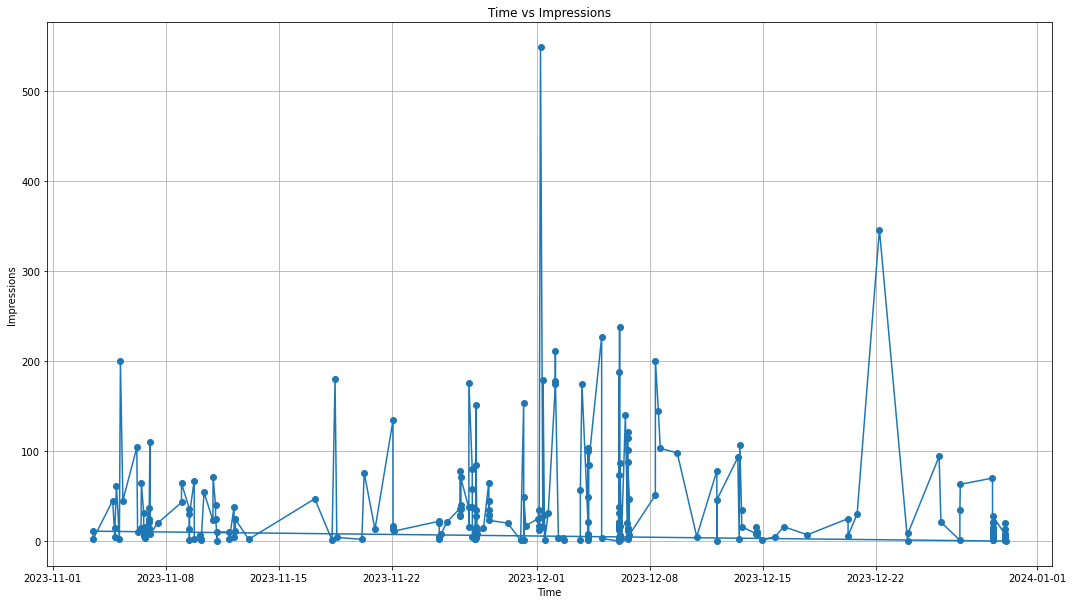

In [95]:
plt.figure(figsize=(18, 10))
plt.plot(df2['time'], df2['impressions'], marker='o')
plt.title('Time vs Impressions')
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.grid(True)
plt.show()

### Apparently there're some outliers, so let's remove data that has impressions above 250

In [96]:
df2 = df2.drop(df2[df2['impressions'] >= 250].index)

# Graph 2

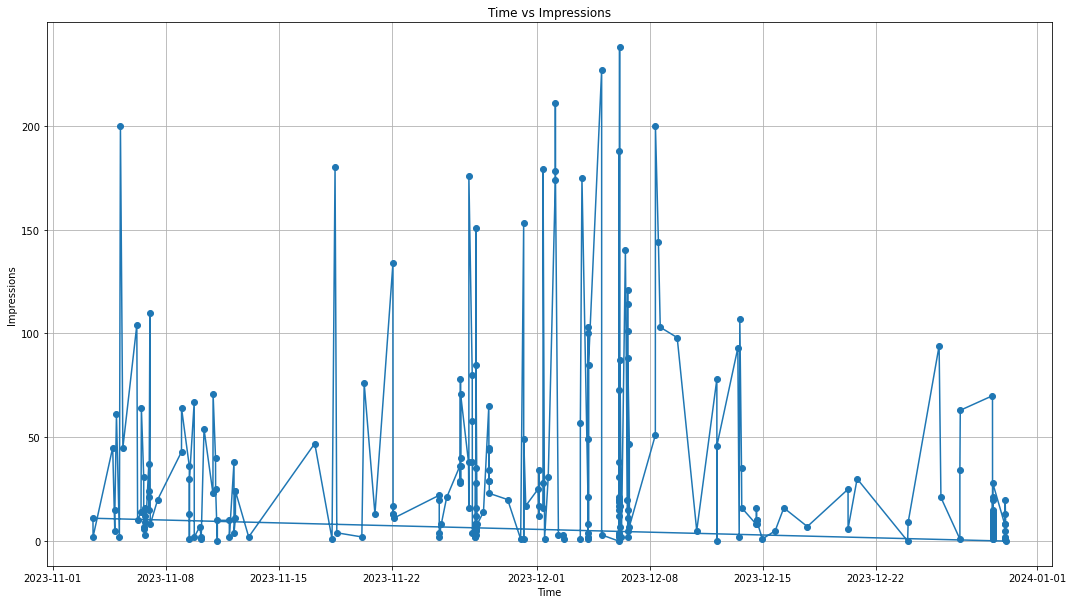

In [97]:
plt.figure(figsize=(18, 10))
plt.plot(df2['time'], df2['impressions'], marker='o')
plt.title('Time vs Impressions')
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.grid(True)
plt.show()

There should be a question of the impact of the number of hashtags on the impressions, so we plot the number of hashtags overtime...

# Graph 3

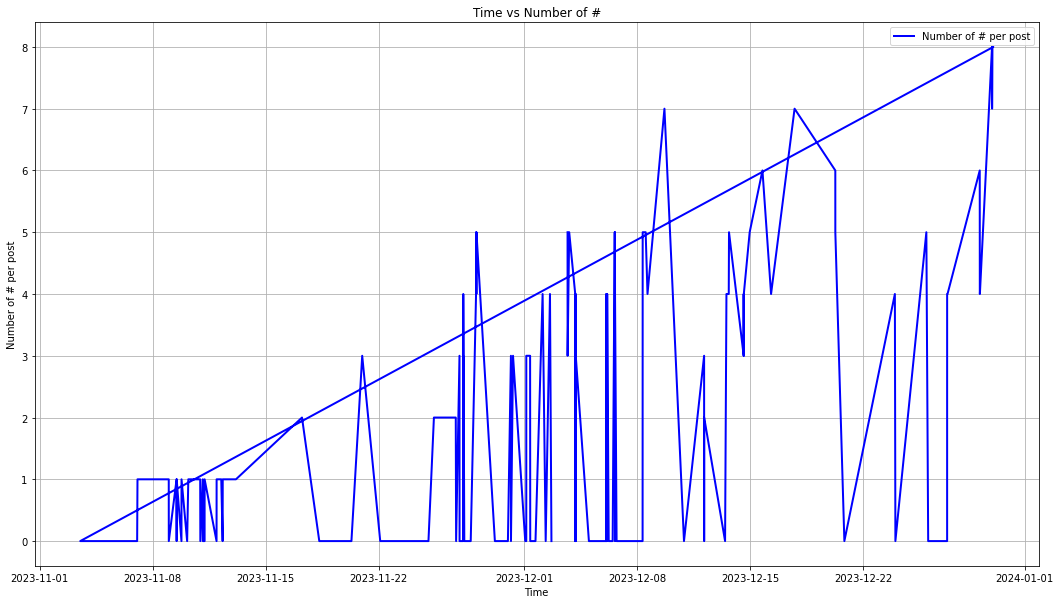

In [99]:
plt.figure(figsize=(18, 10))
plt.plot(df2['time'], df2['count_#'], label='Number of # per post', color='blue', linestyle='-', linewidth=2)
plt.title('Time vs Number of #')
plt.xlabel('Time')
plt.ylabel('Number of # per post')
plt.legend()
plt.grid(True)
plt.show()

### Let's now do the plot for impressions vs # count...

# Graph 4

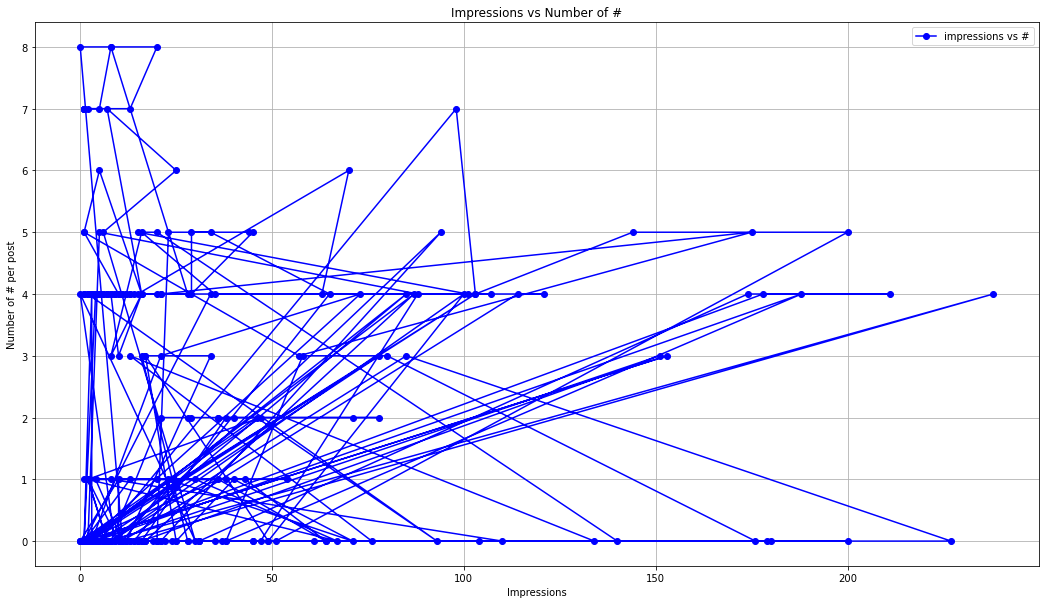

In [106]:
plt.figure(figsize=(18, 10))
plt.plot(df2['impressions'], df2['count_#'], label='impressions vs #', color='blue', marker='o')
plt.title('Impressions vs Number of #')
plt.xlabel('Impressions')
plt.ylabel('Number of # per post')
plt.legend()
plt.grid(True)
plt.show()

# There's obviously a pattern here:
### There appears to be an impact from the presence of hashtags on the number of impressions, but with a certain tolerance, so we find out that above 5 hashtags, there isn't much impressions but with a certain amount of outliers and the same under 2 hashtags.

## The conclusion here is that the ideal reaching post has about 3 hashtags

# This was a study of how to reach more people "How the Algorithm works."
## Next we'll study how to get more interactions on posts
To do so let's plot the relationship between engagements, retweets, likes with the number of #

# Graph 5

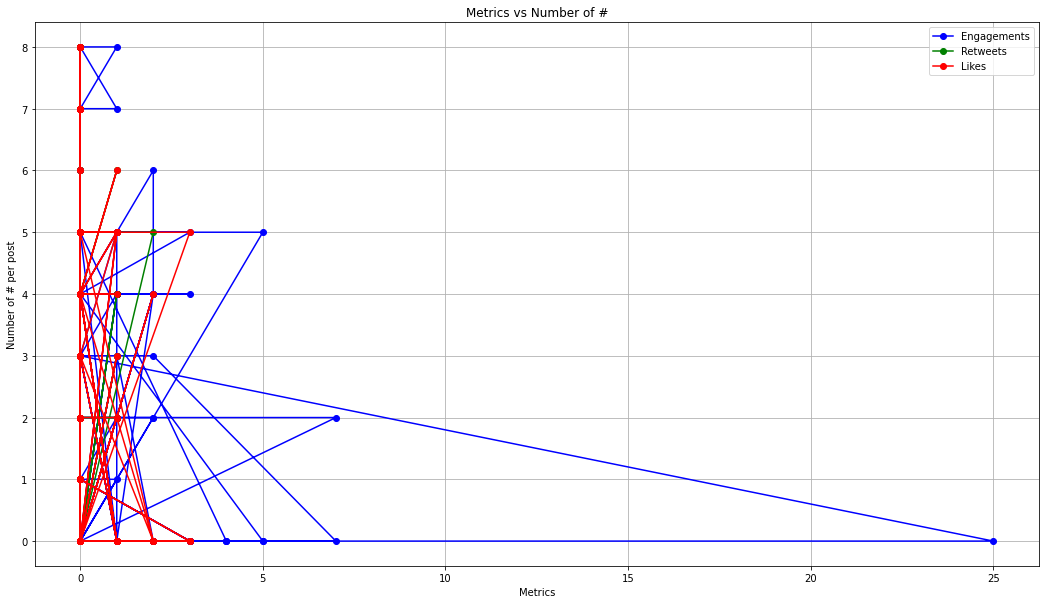

In [111]:
plt.figure(figsize=(18, 10))
colors = ['blue', 'green', 'red']
plt.plot(df2['engagements'], df2['count_#'], label='Engagements', marker='o', color=colors[0])
plt.plot(df2['retweets'], df2['count_#'], label='Retweets', marker='o', color=colors[1])
plt.plot(df2['likes'], df2['count_#'], label='Likes', marker='o', color=colors[2])
plt.title('Metrics vs Number of #')
plt.xlabel('Metrics')
plt.ylabel('Number of # per post')
plt.legend()
plt.grid(True)
plt.show()

# I might have come to the same conclusion of the relationship between number of # and other metrics, so we out that between 2 and 5 # on a post seems to have constant movements on all metrics.

In [113]:
df3 = df2[df2['count_#'] == 0]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   time                        117 non-null    datetime64[ns, UTC]
 1   impressions                 117 non-null    float64            
 2   engagements                 117 non-null    float64            
 3   engagement rate             114 non-null    float64            
 4   retweets                    117 non-null    float64            
 5   replies                     117 non-null    float64            
 6   likes                       117 non-null    float64            
 7   user profile clicks         117 non-null    float64            
 8   url clicks                  117 non-null    float64            
 9   hashtag clicks              117 non-null    float64            
 10  detail expands              117 non-null    float64           

## Now I've made a really important discovery from my data, which is that 42% of the post have 0 hashtags.
### There're two things to do here, first we find out the relation of the metrics to the posts with no #, and second we remove those values to have a more precise findings.

# first we find out the relation of the metrics to the posts with no hashtags
### Those are save to the variable df3

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   time                        117 non-null    datetime64[ns, UTC]
 1   impressions                 117 non-null    float64            
 2   engagements                 117 non-null    float64            
 3   engagement rate             114 non-null    float64            
 4   retweets                    117 non-null    float64            
 5   replies                     117 non-null    float64            
 6   likes                       117 non-null    float64            
 7   user profile clicks         117 non-null    float64            
 8   url clicks                  117 non-null    float64            
 9   hashtag clicks              117 non-null    float64            
 10  detail expands              117 non-null    float64           

# Graph 6

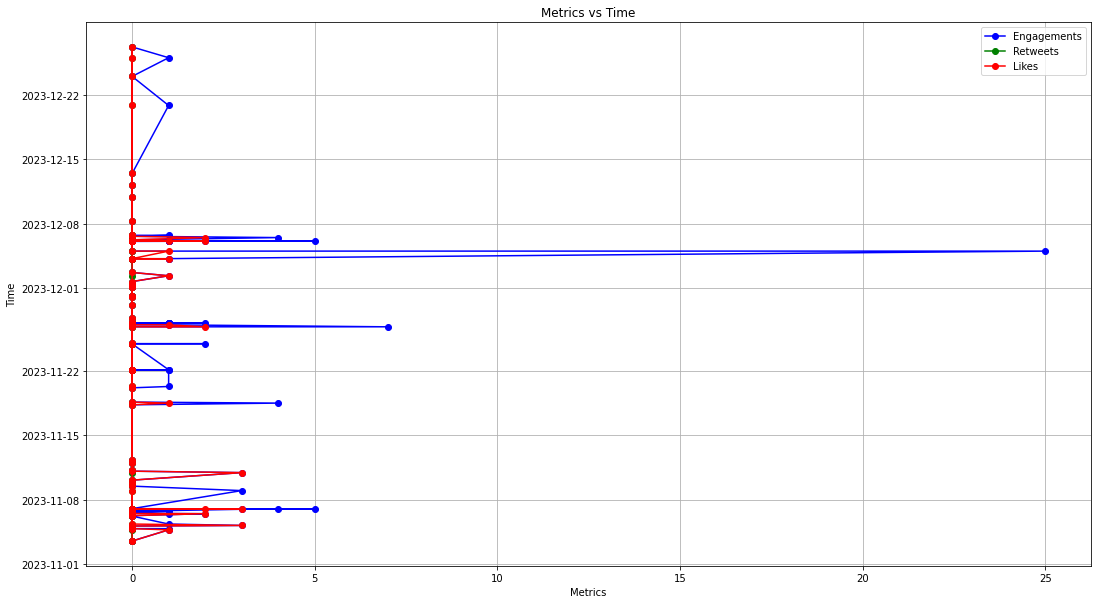

In [118]:
plt.figure(figsize=(18, 10))
colors = ['blue', 'green', 'red']
plt.plot(df3['engagements'], df3['time'], label='Engagements', marker='o', color=colors[0])
plt.plot(df3['retweets'], df3['time'], label='Retweets', marker='o', color=colors[1])
plt.plot(df3['likes'], df3['time'], label='Likes', marker='o', color=colors[2])
plt.title('Metrics vs Time')
plt.xlabel('Metrics')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.show()

## This is really important, all the posts with no hashtags have no engagement what so ever, so we see the impressions 

# Graph 7

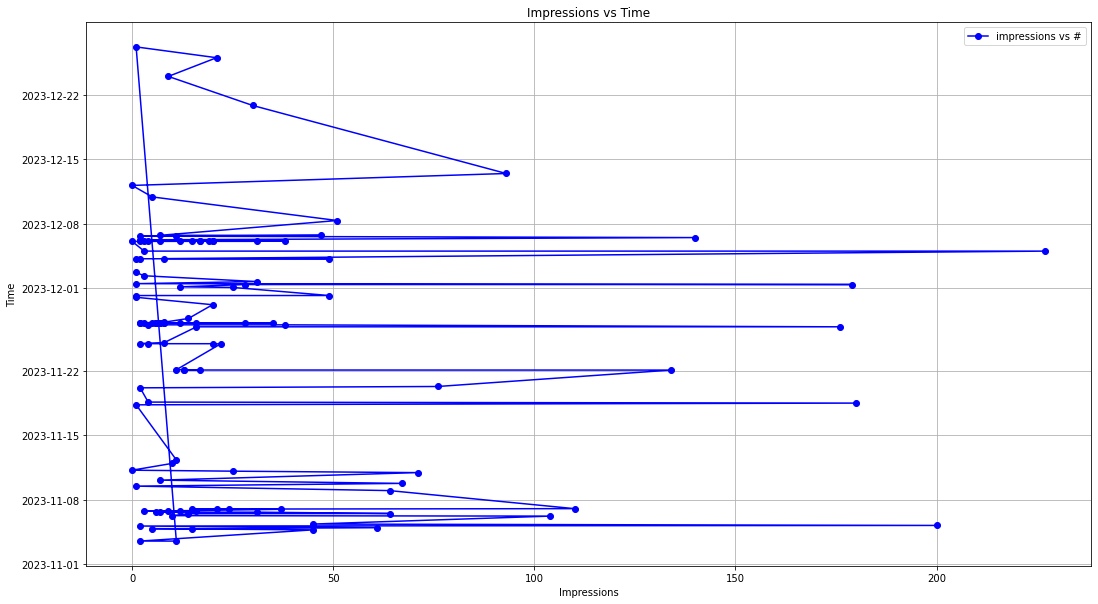

In [119]:
plt.figure(figsize=(18, 10))
plt.plot(df3['impressions'], df3['time'], label='impressions vs #', color='blue', marker='o')
plt.title('Impressions vs Time')
plt.xlabel('Impressions')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.show()

## Here we find out that if we remove the outliers, the margin of the impressions doesn't go above 50 that much, but we first we need to find the effect of those impressions against the total number of impressions so far.

In [125]:
depth_of_impressions = df3['impressions'].sum()/df2['impressions'].sum()
total = df2['impressions'].sum()
print('The depth of the zero hashtags on impressions is {}, and the total impressions are {}'.format(depth_of_impressions, total))

The depth of the zero hashtags on impressions is 0.37532600068034927, and the total impressions are 8819.0


## It'll be really hard to drop that many impressions from the study unless the depth of the number of posts with no hashtags is closer to 1

In [126]:
depth_of_post_n = df2[df2['count_#'] == 0].count()/df2.count()
print('The depth of the number of posts with no hashtags is {}'.format(depth_of_post_n))

The depth of the number of posts with no hashtags is time                          0.428571
impressions                   0.428571
engagements                   0.428571
engagement rate               0.425373
retweets                      0.428571
replies                       0.428571
likes                         0.428571
user profile clicks           0.428571
url clicks                    0.428571
hashtag clicks                0.428571
detail expands                0.428571
permalink clicks              0.428571
follows                       0.428571
media views                   0.428571
media engagements             0.428571
promoted media engagements    0.428571
count_#                       0.428571
dtype: float64


## Let's do the same for the metrics

In [128]:
depth_of_metrics = df3[['engagements','retweets','likes']].sum()/df2[['engagements','retweets','likes']].sum()
total_metrics = df2[['engagements','retweets','likes']].sum()
print('The depth of the zero hashtags on metrics is {}, and the total sum of metrics are {}'.format(depth_of_metrics, total_metrics))

The depth of the zero hashtags on metrics is engagements    0.668874
retweets       0.000000
likes          0.634146
dtype: float64, and the total sum of metrics are engagements    151.0
retweets         8.0
likes           41.0
dtype: float64


# To sum the numbers:
### Depth of post with no # on impressions 0.37532600068034927
### Total impressions are 8819
### Depth of number of posts with no hashtags 0.428571
### Depth of metrics for those posts 0.668874
### Total number of metrics 151

## Conclusion: Posts with no hashtags are significant and dropping them will impact the study.

# New approach, relationship between impressions and engagement

In [140]:
df2[df2['media views']>0]

,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,promoted media engagements,count_#
55,2023-11-26 18:26:00+00:00,38.0,7.0,0.184211,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,6,-,2
63,2023-11-25 09:57:00+00:00,21.0,2.0,0.095238,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,-,2
80,2023-11-17 05:50:00+00:00,47.0,1.0,0.021277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,-,2
81,2023-11-13 03:39:00+00:00,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,-,1
113,2023-11-06 23:07:00+00:00,37.0,3.0,0.081081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,3,-,0


# Graph 8

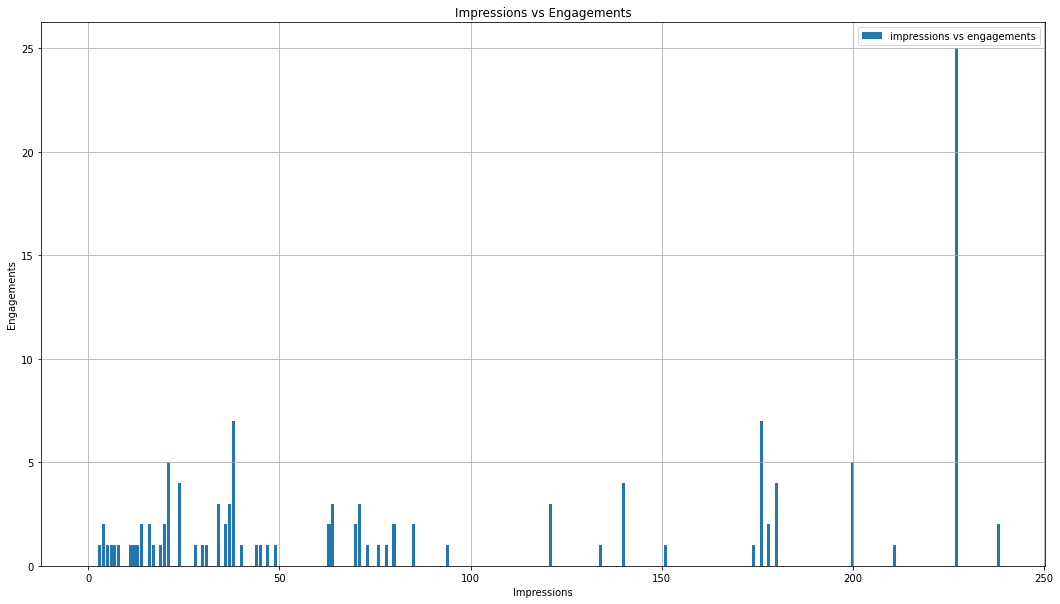

In [155]:
plt.figure(figsize=(18, 10))
plt.bar(df2['impressions'], df2['engagements'], label='impressions vs engagements')
plt.title('Impressions vs Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagements')
plt.legend()
plt.grid(True)
plt.show()

## There is a potentiality of a threashold above 200 impressions that helps increase engagements, so we investigate.

In [146]:
df['engagements'].describe()

count    275.000000
mean       0.552727
std        1.820389
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       25.000000
Name: engagements, dtype: float64

## Let's find out the number of posts with engagements above 1 since the 75 percentile is 1

In [147]:
df2[df2['engagements'] > 1].count()

time                          27
impressions                   27
engagements                   27
engagement rate               27
retweets                      27
replies                       27
likes                         27
user profile clicks           27
url clicks                    27
hashtag clicks                27
detail expands                27
permalink clicks              27
follows                       27
media views                   27
media engagements             27
promoted media engagements    27
count_#                       27
dtype: int64

### So we have 27 posts with engagements above 1
### Now we re-plot them together

# Graph 9

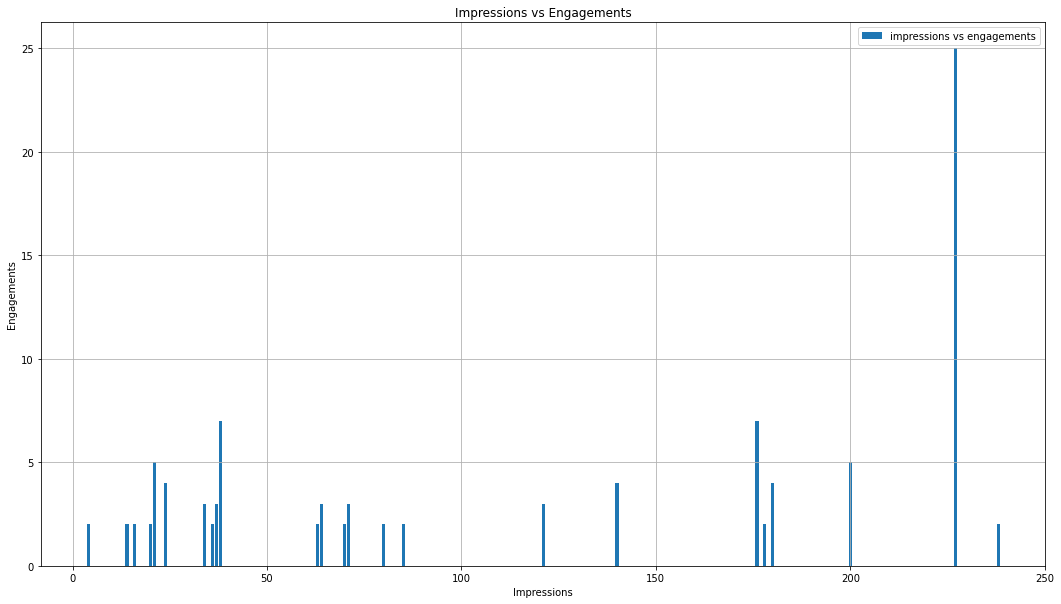

In [151]:
plt.figure(figsize=(18, 10))
filtered = df2[df2['engagements']>1]
plt.bar(filtered['impressions'], filtered['engagements'], label='impressions vs engagements')
plt.title('Impressions vs Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagements')
plt.legend()
plt.grid(True)
plt.show()

# Graph 10

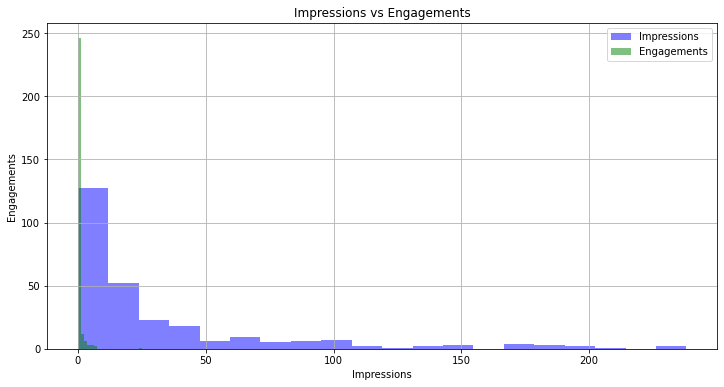

In [153]:
plt.figure(figsize=(12, 6))
plt.hist(df2['impressions'], bins=20, alpha=0.5, label='Impressions', color='blue')
plt.hist(df2['engagements'], bins=20, alpha=0.5, label='Engagements', color='green')

plt.title('Impressions vs Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagements')
plt.legend()
plt.grid(True)
plt.show()

## This finding is important to note that the histogram is skewed left and most engagements on posts are from posts with very low reach.
### Investigating the content of the post might be worth the while but for the sake of privacy I won't dive into the posts.

# Final Conclusion
    1- Two thirds of the engagement comes from posts with no hashtags.
    2- The number of posts with no hashtags is approximately 43%
    3- The best performance is posts with really low impressions as shown in 'Graph 10', this calls for an investigation 
        into the content of the posts to find out the pattern.
    4- A good proportion of the engagements are from posts with high impressions as shown in 'Graph 9'
    

### The original files are to be removed in the following line after making sure all the work is done.

In [157]:
os.remove('tweet_activity_first.csv')
os.remove('tweet_activity_second.csv')